<a href="https://colab.research.google.com/github/Tisks/Covid-Big-Data/blob/master/Data_nacional_grafico_barras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto16/CasosGeneroEtario.csv', sep= ',')
df

,Grupo de edad,Sexo,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-29,2020-03-30,2020-03-31,2020-04-01,2020-04-02,2020-04-03,2020-04-04,2020-04-05,2020-04-06,2020-04-07,2020-04-08,2020-04-09,2020-04-10,2020-04-11,2020-04-12,2020-04-13,2020-04-14,2020-04-15,2020-04-16,2020-04-17,2020-04-18,2020-04-19,2020-04-20,2020-04-21,2020-04-22,2020-04-23,2020-04-24,2020-04-25,2020-04-26,2020-04-27,2020-04-28,2020-05-01,2020-05-02,2020-05-04,2020-05-06,2020-05-08,2020-05-11,2020-05-15,2020-05-18,2020-05-22,2020-05-25,2020-05-29,2020-06-01,2020-06-05,2020-06-08,2020-06-12,2020-06-15,2020-06-19,2020-06-23,2020-06-28,2020-07-01,2020-07-05,2020-07-10,2020-07-13,2020-07-17,2020-07-24,2020-07-27,2020-07-31,2020-08-03,2020-08-07
0,00 - 04 años,M,4,5,5,5,5,5,6,7,7,8,10,9,11,12,18,22,30,37,39,38,41,46,49,52,61,65,66,75,83,88,93,100,106,111,124,157,177,201,233,277,334,468,543,725,866,1028,1121,1274,1378,1535,1651,2058,2302,2565,2673,2848,3022,3132,3240,3392,3473,3564,3651,3792
1,05 - 09 años,M,2,2,2,4,4,4,4,7,7,9,10,11,13,14,17,18,20,27,27,27,29,32,35,38,42,44,45,52,58,61,66,71,80,81,89,115,126,143,173,194,244,347,410,540,631,742,820,932,1009,1104,1200,1573,1772,1981,2072,2210,2374,2489,2604,2733,2805,2887,2966,3105
2,10 - 14 años,M,7,8,8,10,10,10,10,12,12,13,16,21,23,23,31,34,37,40,46,51,53,57,65,71,81,86,90,96,101,105,108,114,119,125,133,159,173,197,228,247,294,412,490,612,714,840,948,1078,1176,1315,1420,1851,2054,2307,2367,2517,2731,2860,2979,3157,3224,3295,3361,3512
3,15 - 19 años,M,8,9,13,16,17,18,22,26,27,34,37,42,50,52,56,60,65,69,73,77,79,86,96,103,109,113,116,118,126,136,139,153,164,175,185,222,243,279,324,370,453,626,743,964,1133,1358,1552,1776,1976,2237,2455,3286,3640,4088,4235,4547,4837,5016,5219,5467,5610,5743,5841,6059
4,20 - 24 años,M,25,32,35,46,52,58,64,72,84,99,118,125,138,145,175,192,209,235,243,252,274,290,309,327,343,353,368,386,399,419,436,452,473,492,523,640,720,809,907,1045,1219,1583,1864,2487,2967,3644,4255,4908,5531,6381,7089,9355,10344,11420,11824,12487,13089,13505,13911,14493,14735,15055,15259,15711
5,25 - 29 años,M,61,75,87,100,107,116,128,147,154,187,222,236,252,268,312,332,366,389,409,434,457,486,519,558,577,596,613,635,672,715,745,790,823,855,892,1102,1232,1390,1564,1747,2058,2692,3118,4211,4996,6131,7069,8170,9264,10740,11878,15283,16776,18389,19034,20041,20984,21603,22215,23090,23482,23905,24255,24871
6,30 - 34 años,M,88,106,115,137,139,149,170,188,199,226,251,274,295,310,353,372,405,431,440,469,494,526,552,578,608,625,646,669,693,736,763,803,834,857,910,1101,1201,1376,1553,1807,2102,2820,3258,4409,5229,6393,7309,8491,9614,11057,12240,15456,17023,18717,19378,20423,21431,22065,22712,23627,24063,24505,24845,25428
7,35 - 39 años,M,72,86,96,119,133,142,158,174,185,213,234,251,263,276,324,340,372,384,399,423,438,461,494,520,543,567,584,604,632,656,675,707,735,755,788,950,1032,1168,1337,1506,1766,2325,2697,3590,4361,5264,6016,7034,8000,9147,10176,12873,14139,15565,16139,16979,17815,18292,18754,19530,19819,20206,20473,20929
8,40 - 44 años,M,62,71,82,97,112,125,141,157,164,188,202,220,234,246,284,308,327,338,358,387,393,415,437,455,467,484,502,524,550,575,587,618,637,662,696,830,895,991,1125,1272,1481,1947,2259,2963,3598,4336,5006,5810,6615,7586,8427,10562,11641,12870,13351,14126,14831,15269,15730,16399,16655,16984,17231,17619
9,45 - 49 años,M,47,55,69,86,95,108,125,139,151,171,192,206,221,234,274,289,303,326,342,357,363,386,407,432,446,461,481,489,506,535,559,580,596,609,632,769,839,923,1013,1177,1357,1791,2101,2845,3405,4143,4790,5583,6348,7305,8146,10289,11327,12469,12923,13692,14412,14857,15297,15952,16245,16603,16846,17240


In [36]:
#Obtener la ultima fecha que tiene el csv
Fecha_actual= list(df.columns)[-1]
print(Fecha_actual) 


2020-08-07


In [69]:
#Generar un Data Frame que saque la informacion segun grupo etario, sexo y la ultima fecha.
mip = df[['Grupo de edad', 'Sexo', Fecha_actual]]

#Se pueden generar 2 df; con la data de hombres y de mujeres
df_F = mip.groupby('Sexo').get_group('F').drop(['Sexo'], axis=1)
df_M = mip.groupby('Sexo').get_group('M').drop(['Sexo'], axis=1)
df_M

,Grupo de edad,2020-08-07
0,00 - 04 años,3792
1,05 - 09 años,3105
2,10 - 14 años,3512
3,15 - 19 años,6059
4,20 - 24 años,15711
5,25 - 29 años,24871
6,30 - 34 años,25428
7,35 - 39 años,20929
8,40 - 44 años,17619
9,45 - 49 años,17240


In [108]:
m = list(df_M[Fecha_actual])
m

[3792,
 3105,
 3512,
 6059,
 15711,
 24871,
 25428,
 20929,
 17619,
 17240,
 16388,
 15420,
 11553,
 7298,
 5177,
 3528,
 4270]

In [109]:
f = list(df_F[Fecha_actual])
f

[3489,
 2919,
 3635,
 6883,
 15667,
 24349,
 22679,
 18125,
 15352,
 16037,
 15247,
 13828,
 9865,
 6544,
 4943,
 3800,
 6742]

In [127]:
rango = list(mip['Grupo de edad'].drop_duplicates())

In [149]:
rango2=[4,9,14,19,24,29,34,39,44,49,54,59,64,69,74,79]

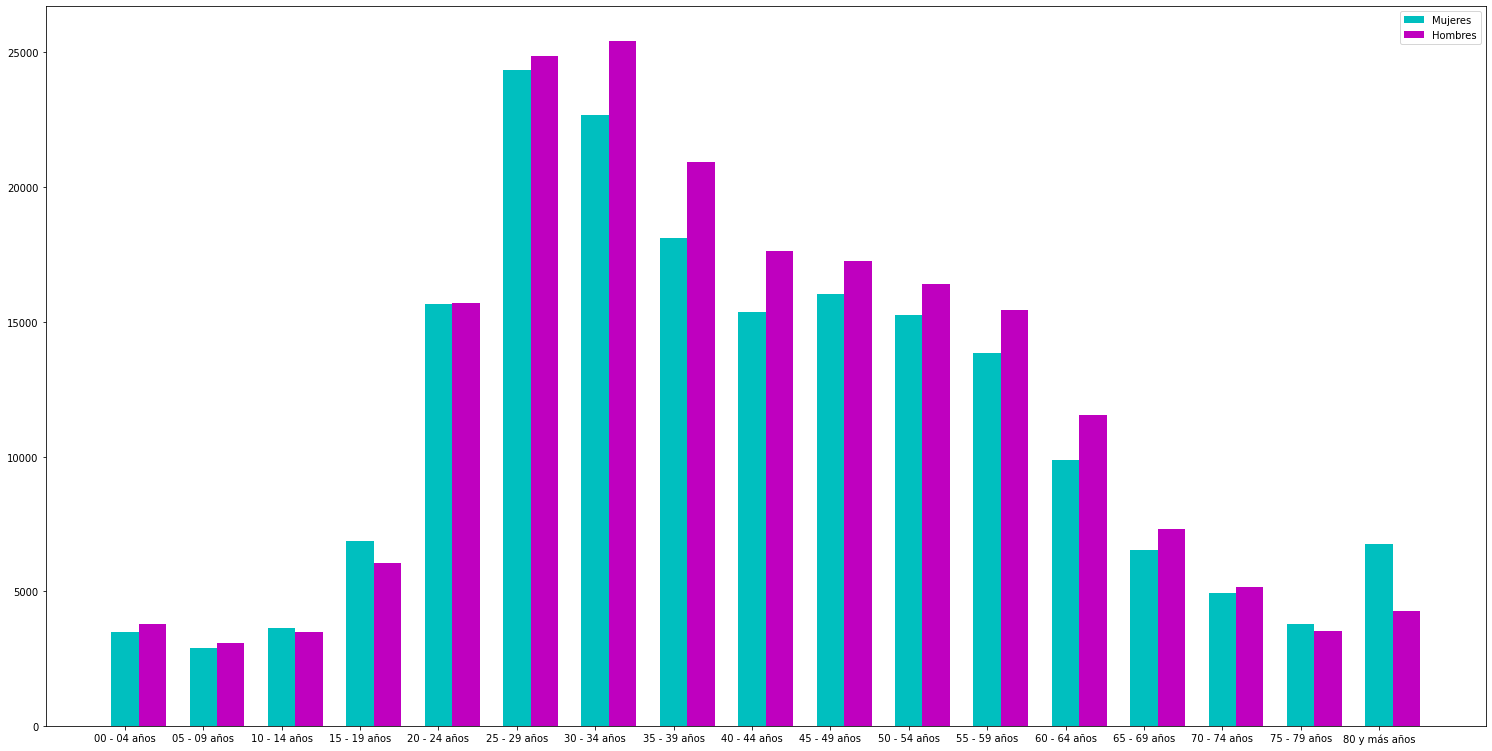

In [159]:
x = np.arange(17)
fig = plt.figure(figsize =(20,10))

ax = fig.add_axes([0,0,1,1])


ax.bar(x + 0.00, f, color = 'c', width = 0.35)
ax.bar(x + 0.35, m, color = 'm', width = 0.35)

ax.legend(labels=['Mujeres', 'Hombres'])

ax.set_xticks(x)
ax.set_xticklabels(rango)
#ax.bar(rango,f)
plt.show()